In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv("C:/Users/hi/OneDrive/Documents/practice/ExpenseReport.csv", parse_dates=['Date'], index_col = 'Date')
data

,Month,Year,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
Date,,,,,,,,,,
2022-03-02 10:11:00,March,2022,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0
2022-03-02 10:11:00,March,2022,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0
2022-03-01 19:50:00,March,2022,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0
2022-03-01 18:56:00,March,2022,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0
2022-03-01 18:22:00,March,2022,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22 14:16:00,November,2021,CUB - online payment,Food,Dinner,90.0,Expense,90.0,INR,90.0
2021-11-22 14:16:00,November,2021,CUB - online payment,Food,Lunch with company,97.0,Expense,97.0,INR,97.0
2021-11-21 17:07:00,November,2021,CUB - online payment,Transportation,Rapido,130.0,Expense,130.0,INR,130.0


In [2]:
import matplotlib as mpl
mpl.use('agg')
from matplotlib.figure import Figure 
def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Amount', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers=(np.abs(residual) > std*sigma)
    return view_fn(avg, avg[outliers])

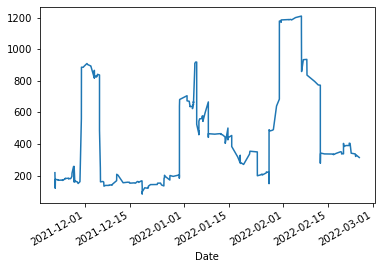

In [3]:
find_outliers(variable='Amount', window=20, sigma=10)

In [7]:
import panel as pn 
pn.extension('tabulator')
!pip install hvplot
import hvplot.pandas

In [8]:
#importing dataset
df = pd.read_csv("C:/Users/hi/OneDrive/Documents/practice/ExpenseReport.csv")
df

,Month,Year,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
0,March,2022,03-02-2022 10:11,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0
1,March,2022,03-02-2022 10:11,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0
2,March,2022,03-01-2022 19:50,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0
3,March,2022,03-01-2022 18:56,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0
4,March,2022,03-01-2022 18:22,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,November,2021,11/22/2021 14:16,CUB - online payment,Food,Dinner,90.0,Expense,90.0,INR,90.0
273,November,2021,11/22/2021 14:16,CUB - online payment,Food,Lunch with company,97.0,Expense,97.0,INR,97.0
274,November,2021,11/21/2021 17:07,CUB - online payment,Transportation,Rapido,130.0,Expense,130.0,INR,130.0
275,November,2021,11/21/2021 15:50,CUB - online payment,Food,Lunch,875.0,Expense,875.0,INR,875.0


In [9]:
#viewing columns
df.columns

Index(['Month', 'Year', 'Date', 'Account', 'Category', 'Note', 'INR',
       'Income/Expense', 'Amount', 'Currency', 'Account.1'],
      dtype='object')

In [10]:
### Minor data preprocessing 
#filling NAs with 0s 
df = df.fillna(0)

In [11]:
#making the DataFrame Pipeline interactive 
idf = df.interactive()

In [12]:
#Radiobutton for amount spent
yaxis_as = pn.widgets.RadioButtonGroup(
    name = 'Amount spent',
    options = ['Amount'],
    button_type= 'success'
)
yaxis_as

RadioButtonGroup(button_type='success', name='Amount spent', options=['Amount'], value='Amount')

In [13]:
#extra widget for seeing the year 
year_slider = pn.widgets.IntSlider(name='Year slider', start=2020, end = 2022, step=1, value=2021)
year_slider

IntSlider(end=2022, name='Year slider', start=2020, value=2021)

In [14]:
#widget to access months (one month at a time)
select = pn.widgets.Select(name = 'Select', groups={'2021':['November', 'December'], '2022':['January', 'February', 'March']})
select

Select(groups={'2021': ['November', ...}, value='November')

In [15]:
#data pipelining + widget connections
categories = ['Food', 'Other', 'Social Life', 'Transport', 'Household', 'Apparel', 'Petty cash']
month = ['November', 'December', 'January', 'February', 'March']
as_pipeline = (
    idf[
        (idf.Category.isin(categories)) &
        (idf.Month.isin(month))
    ]
    .groupby(['Month', 'Category'])[yaxis_as].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Category')
    .reset_index(drop=True)
)

In [16]:
as_pipeline

In [18]:
as_plot = as_pipeline.hvplot(x='Category', by='Month', y=yaxis_as, line_width=1, title="Amount spent per category")
as_plot

In [20]:
## table- money spent over each category per month
##vieweing 5 rows in a page 
as_table = as_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=5, sizing_mode='stretch_width')
as_table

In [22]:
 ## amount per month that is spent
###pipelining the "select" widget to categorize expenses only in a certain month
aspm_scatter = (
    idf[
        (idf.Month == select)&
        (~(idf.Category.isin(categories)))
    ]
    .groupby(['Category', 'Month'])['Amount'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Month')
    .reset_index(drop=True)
)

In [23]:
#vieweing the pipeline (it works!!!)
aspm_scatter

In [26]:
#forming the scatterplot (also works!!!)
aspm_scatter_plot = aspm_scatter.hvplot(x='Month', y='Amount', by='Category', size=80, kind='scatter',
                                       alpha=0.7, legend=False, height=500, width=500)
aspm_scatter_plot

In [32]:
#creating another widget for yet another visualization
yaxis_as_source=pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['Amount'],
    button_type='success'
)
#forming YET another data pipeline for bargraphs
as_excel = ['November', 'December', 'January', 'February', 'March']
as_excel_barpipe = (
    idf[
        (idf.Month == select)&
        (idf.Category.isin(as_excel))
    ]
    .groupby(['Month', 'Category'])[yaxis_as_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Month')
    .reset_index(drop=True)
)

In [35]:
#forming the bargraph (is not really showing any visuals i wonder why)
as_excel_barplot = as_excel_barpipe.hvplot(kind='bar', x='Month', y=yaxis_as_source, title='Expense in INR per month')
as_excel_barplot

In [38]:
###Creating the dashboard! 

#layout using Template
template = pn.template.FastListTemplate(
    title='Personal Expense Reports dashboard',
    sidebar=[pn.pane.Markdown("# Total expenses recorded until yet *From December 2021 to March 2022*)"),
             pn.pane.Markdown("#### With the help of visualization of data, it becomes more easier and efficient to track expenses instead of blindly jotting them down :)"),
             pn.pane.PNG('smiley wallet.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),
             select],
    main=[pn.Row(pn.Column(yaxis_as, as_plot.panel(width=700), margin=(0,25)), 
                 as_table.panel(width=500)),
          pn.Row(pn.Column(aspm_scatter_plot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_as_source, as_excel_barplot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)

#template.show()
template.servable();